## Case Study: Prediction of Graduate Admissions

<img src="airline.jpg" width=500 height = 280/>

**Data to be used**: `airline.csv`


### Import Libraries

In [ ]:
import pandas as pd                  # Pandas                 # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

**Install MAPIE via `pip`**:

`!pip install mapie`

### Load Dataset

In [35]:
# Import Data
df = pd.read_csv('airline.csv')
df.head()

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,dissatisfied,Loyal Customer,48,Personal Travel,Eco,4001,1,1,1,1,...,1,1,4,1,1,4,2,1,16,0
1,dissatisfied,Loyal Customer,48,Personal Travel,Eco,3980,1,1,1,1,...,4,4,2,3,2,3,2,4,0,0
2,dissatisfied,Loyal Customer,40,Personal Travel,Eco,2251,1,1,1,1,...,1,1,3,3,2,1,1,1,0,8
3,dissatisfied,Loyal Customer,46,Personal Travel,Eco,2453,1,1,1,1,...,5,3,1,4,1,2,2,3,3,15
4,dissatisfied,Loyal Customer,63,Personal Travel,Eco,2011,1,1,1,1,...,5,5,1,5,2,1,2,5,25,25


In [36]:
# Select input and output features
X = df.drop(columns = ['satisfaction'])
y = df['satisfaction']

In [37]:
# Save the raw feature dataframe (before encoding)
X.to_csv("airline_train_raw.csv", index=False)

In [38]:
# One hot encoding for categorical variables
X_encoded = pd.get_dummies(X)
X_encoded.head()

,age,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,...,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
0,48,4001,1,1,1,1,1,1,1,1,...,1,16,0,True,False,False,True,False,True,False
1,48,3980,1,1,1,1,4,1,4,4,...,4,0,0,True,False,False,True,False,True,False
2,40,2251,1,1,1,1,1,1,1,1,...,1,0,8,True,False,False,True,False,True,False
3,46,2453,1,1,1,1,3,1,5,3,...,3,3,15,True,False,False,True,False,True,False
4,63,2011,1,1,1,1,5,1,5,5,...,5,25,25,True,False,False,True,False,True,False


In [39]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

### Implement Random Forest Regressor

In [40]:
# Define your model
clf = DecisionTreeClassifier(random_state = 42)

In [41]:
# Fit the model
start = time.time()            # Start Time
clf.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.47385120391845703s


#### Evaluate Prediction Performance on Test Set

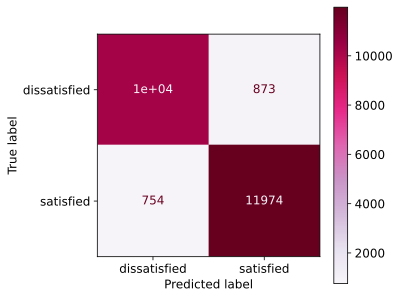

In [42]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat_dt_mobile.svg", bbox_inches = 'tight');

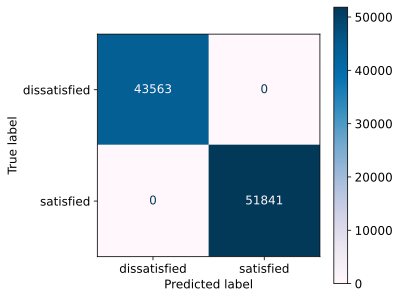

In [43]:
# Predictions on training set
y_pred_train = clf.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, y_pred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

#### **Classification Report**

In [44]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('df_class_report_mobile.csv') 

#### **Feature Importance Analysis**

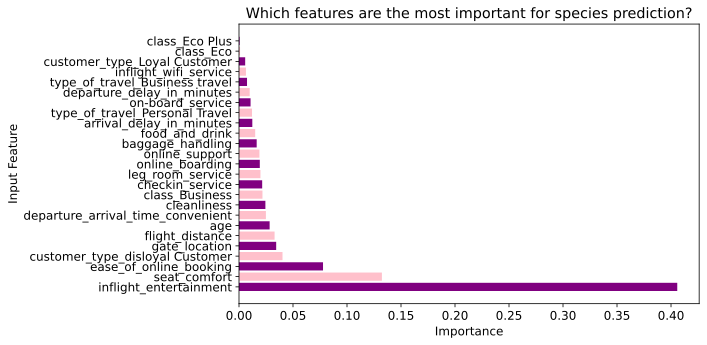

In [45]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_mobile_dt.svg");

### Save Model

In [46]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_airline.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 